In [29]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import joblib

In [2]:
# Carregando o arquivo para um Dataset
dataset = pd.read_csv('wine.csv')

In [3]:
# Análise Exploratória

# Verificando a estrutura do Dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Verificando os valores possíveis da variável TARGET (type)
dataset.type.unique()

array(['red', 'white'], dtype=object)

In [6]:
# Verificando se existe algum valor nulo dentro do Dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
# Alterando o tipo da coluna 'type' de object para category
dataset.type = dataset.type.astype('category')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


In [9]:
# Transformando a coluna 'type' em categórica numérica
dataset.type = dataset.type.map({'red': 0, 'white': 1})

In [10]:
# Verificando o balanceamento das classes da variável Target (coluna 'type'
dataset.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

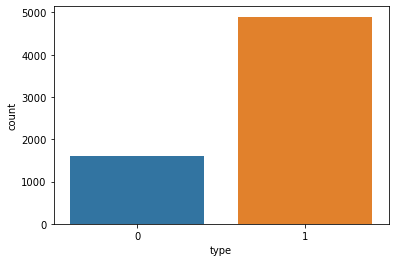

In [11]:
# Visualizando graficamente a distribuição das classes
class_distribution = sb.countplot(x=dataset.type, data=dataset)

In [12]:
# Observe acima que existem mais vinhos do tipo branco do que tinto. Esse desbalancealemto pode afetar
# o modelo de Machine Learning no que diz respeito a sua acurácia. 
# Para corrigir esse problema de balanceamento de classes podemos aplicar a técnica de Undersampling ou Oversampling
# Neste caso, como os dados históricos não são tão numerosos, optei em realizar o Oversampling, igualando a 
# quantidade da classe minoritária com a majoritária de forma aleatória.

# Antes de aplicar o algoritmo SMOTE é necessário separar as variáveis preditoras da variável target.
# Vou chamar de x as variáveis preditoras (as características que definem o tipo de vinho) e y a variável target
x = dataset.drop('type', axis=1)
y = dataset.type

In [13]:
# Visualziando a separação dos dados
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
y.head(1)

0    0
Name: type, dtype: category
Categories (2, int64): [0, 1]

In [15]:
x.shape , y.shape

((6497, 12), (6497,))

In [16]:
# Utilizando o algoritmo SMOTE para gerar dados sintéticos e assim igualar as classes

# Instânciando o algoritmo SMOTE
smt = SMOTE()

In [17]:
# Aplicando o SMOTE nos dados
x,y = smt.fit_sample(x,y)

In [18]:
# Visualizando novamente a dstribuição das classes após a aplicação do algoritmo
y.value_counts()

1    4898
0    4898
Name: type, dtype: int64

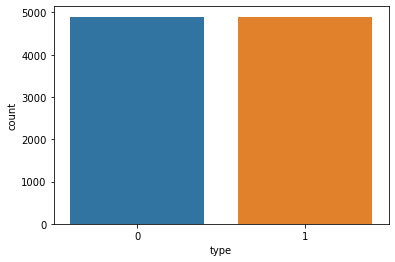

In [19]:
sb.countplot(x=y)

In [20]:
# Separando os dados de Treino e os dados de Teste
xTrain, xTest, yTrain, yTest = train_test_split(x,y)

In [21]:
# Para este projeto utilizei o algoritmo Logistic Regression. Poderia utilizar qualquer outro. Numa outra
# análise utilizarei o PIPELINE para treinar os dados com vários algoritmos.

# Instânciando o Classificador
model = LogisticRegression(max_iter=200)

In [22]:
# Treinando o modelo
model.fit(xTrain, yTrain)

/Users/rp/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200)

In [23]:
# Fazendo as pedições
prediction = model.predict(xTest)

In [24]:
# Checando a acurácia do modelo
accuracy_score(yTest, prediction)

0.9755002041649653

In [25]:
# Checando Precisão, Recall, f1-score
print(classification_report(yTest, prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1257
           1       0.97      0.98      0.97      1192

    accuracy                           0.98      2449
   macro avg       0.98      0.98      0.98      2449
weighted avg       0.98      0.98      0.98      2449



In [26]:
# Gerando a Confusion Matrix 
print(pd.crosstab(yTest, prediction, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1225    32  1257
1          28  1164  1192
All      1253  1196  2449


In [27]:
# Observe acima na Confusion Matrix que o modelo errou apenas 32 vezes as predições para vinho Tinto e 28 vezes
# para vinho branco.

In [30]:
# Realizando o Deploy do modelo em disco utilizando o Joblib
joblib.dump(model, 'Model_Classification_Wine.joblib')

['Model_Classification_Wine.joblib']

In [31]:
!ls

Model_Classification_Wine.joblib wine.csv
TiposDeVinhos.ipynb
